# Practical Application of k-Mode Clustering on Bank Marketing Dataset

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from kmode import k_mode_clustering

bank = pd.read_csv('bankmarketing.csv') # loading of the dataset
# selecting important and generic columns from the dataset
bank_cust = bank[['age','job', 'marital', 'education', 'default', 
                  'housing', 'loan','contact','month','day_of_week','poutcome']]
# binning the age groups with class width of 10
bank_cust['age_bin'] = pd.cut(bank_cust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
bank_cust  = bank_cust.drop('age',axis = 1) # dropping the age attribute
# label encoding for textual features (all categorical columns)
le = preprocessing.LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)

In [2]:
bank_cust.head() # displaying top 5 rows the modified dataset

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,3,1,0,0,0,0,1,6,1,1,4
1,7,1,3,1,0,0,1,6,1,1,4
2,7,1,3,0,2,0,1,6,1,1,2
3,0,1,1,0,0,0,1,6,1,1,2
4,7,1,3,0,0,2,1,6,1,1,4


In [3]:
data_ = np.array(bank_cust) # converting pandas dataframe into numpy array

In [4]:
# converting numpy array to 2-D List
data = []
for i in range(data_.shape[0]):
    data.append(list(data_[i])) 

In [5]:
y, cluster_centroids = k_mode_clustering(data, 2) # executing k-means clustering for 2 clusters

Cost i.e., sum of delta metrics for all data-points for Iteration 1:  230978
Cost i.e., sum of delta metrics for all data-points for Iteration 2:  204794


In [6]:
print(cluster_centroids) # printing the cluster centroids

[[0, 1, 6, 0, 2, 0, 0, 6, 2, 1, 2], [0, 2, 6, 0, 2, 0, 0, 6, 1, 1, 3]]


In [7]:
# dataframe concatenation with cluster labels
bank_cust = pd.concat([bank_cust, pd.DataFrame(y, columns = ['label'])], axis = 1)

In [8]:
bank_cust.head() # displaying top 5 rows the modified dataset

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin,label
0,3,1,0,0,0,0,1,6,1,1,4,0
1,7,1,3,1,0,0,1,6,1,1,4,0
2,7,1,3,0,2,0,1,6,1,1,2,0
3,0,1,1,0,0,0,1,6,1,1,2,0
4,7,1,3,0,0,2,1,6,1,1,4,0


In [9]:
cluster0_df = bank_cust.loc[(bank_cust['label'] == 0),:] # filtering data-points with cluster label, 0
cluster1_df = bank_cust.loc[(bank_cust['label'] == 1),:] # filtering data-points with cluster label, 1

## Cluster Visualization on the basis of Job and Age (age-bin) Distributions (Cluster 0 - Left and Cluster 1 - Right) ...

In [10]:
# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Checking the count per category for JOB
job0_df = pd.DataFrame(cluster0_df['job'].value_counts())
job1_df = pd.DataFrame(cluster1_df['job'].value_counts())

# Checking the count per category for AGE_BIN
age0_df = pd.DataFrame(cluster0_df['age_bin'].value_counts())
age1_df = pd.DataFrame(cluster1_df['age_bin'].value_counts())

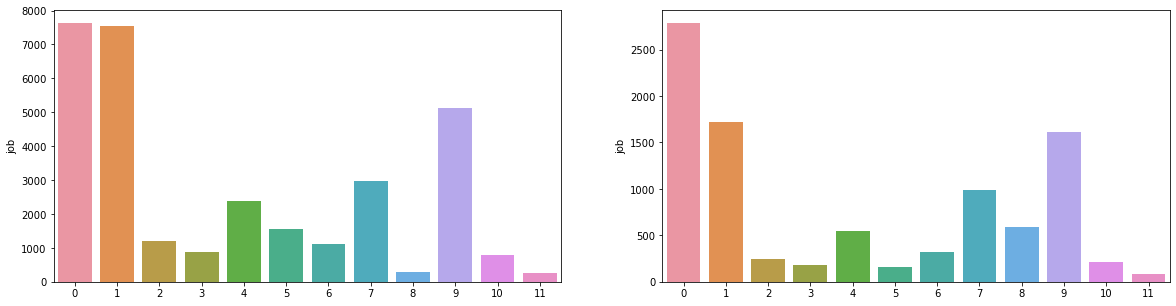

In [11]:
fig, ax =plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=job0_df.index, y=job0_df['job'], ax=ax[0])
sns.barplot(x=job1_df.index, y=job1_df['job'], ax=ax[1])
fig.show()

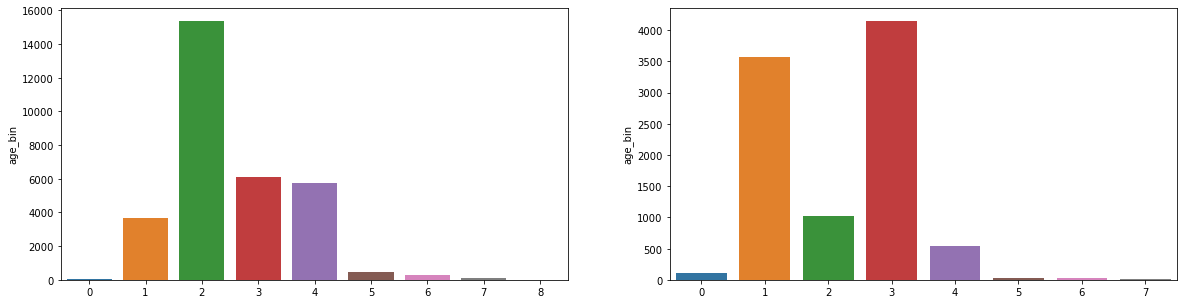

In [12]:
fig, ax =plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=age0_df.index, y=age0_df['age_bin'], ax=ax[0])
sns.barplot(x=age1_df.index, y=age1_df['age_bin'], ax=ax[1])
fig.show()